## CLUSTERING OF CREDIT CARD CUSTOMERS FOR SPECIALIZED MARKETING STRATEGIES 

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from time import time

##### TASK 1

In [2]:
#LOADING DATASET
df1=pd.read_csv('C:\\Users\\Admin\Downloads\cards.csv')

df=df1.copy()
df.drop(['CUST_ID'],axis=1,inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()

(8636, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [3]:
#SCALING DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.0,0.00424,0.000000,0.166667,0.0,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.0,0.00000,0.136685,0.000000,0.0,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0


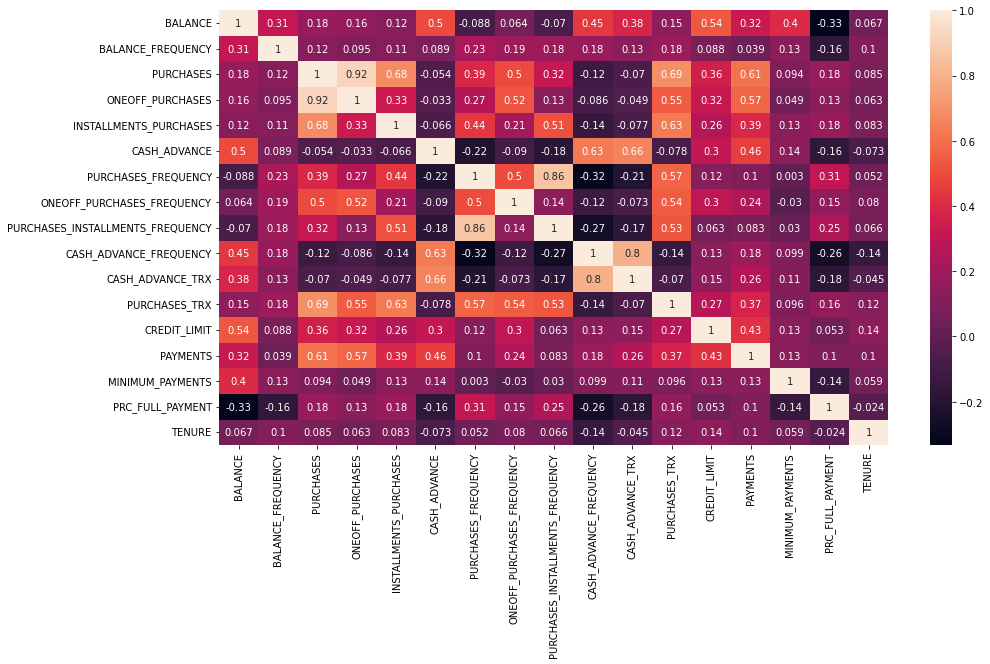

In [4]:
#CHECKING FOR CORRELATION
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

In [5]:
cols=df_scaled.columns

##### TASK 2

#### METHOD 1:- K MEANS

In [6]:
from sklearn.cluster import KMeans

In [7]:
#SELECTING BALANCE AND PAYMENTS COLUMNS
df2=df_scaled[['BALANCE','PAYMENTS']]
df2.head(2)

,BALANCE,PAYMENTS
0,0.002148,0.003978
1,0.168169,0.080892


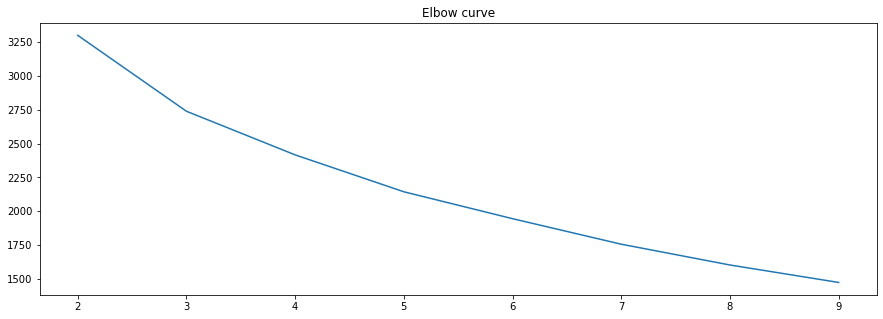

In [8]:
#FINDING K VALUE
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.title('Elbow curve')
plt.show()

From this curve, we can choose K value as 3

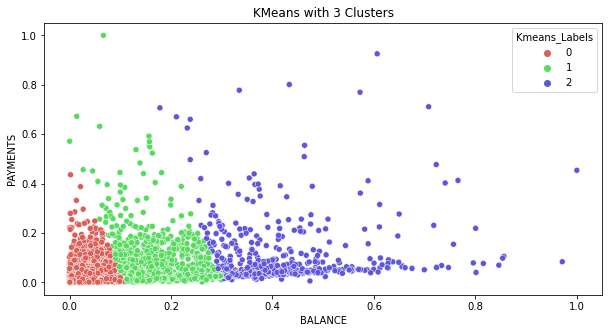

Time taken to run K Means: 1.1539306640625 seconds


In [9]:
start = time()
km = KMeans(n_clusters=3).fit(df2[['BALANCE','PAYMENTS']])

df2['Kmeans_Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df2.iloc[:,0], df2.iloc[:,1], hue=df2['Kmeans_Labels'], 
                palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
df2['Kmeans_Labels']=df2['Kmeans_Labels'].replace([0,1,2],['Low Balance','Medium Balance','High Balance'])
plt.title('KMeans with 3 Clusters')
plt.show()
print(f'Time taken to run K Means: {time() - start} seconds')

K means model seems to be fine with 3 clusters,eventhough they are wide spread.

#### METHOD 2:- DBSCAN 

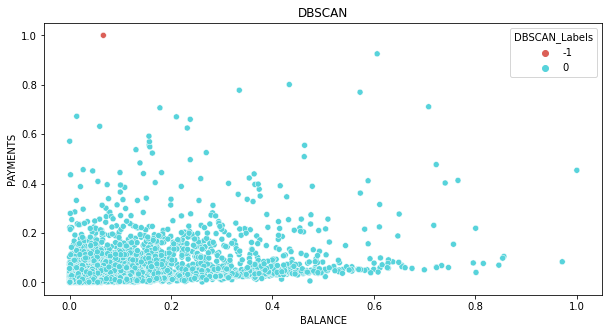

In [10]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.3,min_samples=10).fit(df2[['BALANCE','PAYMENTS']])

df2['DBSCAN_Labels'] = db.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df2.iloc[:,0], df2.iloc[:,1],hue=df2['DBSCAN_Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

This is not working good,as we can see 1 whole cluster with an outlier.Here whole dataset is considered as only 1 cluster,so this technique is not good. 

#### METHOD 3:- AGGLOMERATIVE CLUSTERING

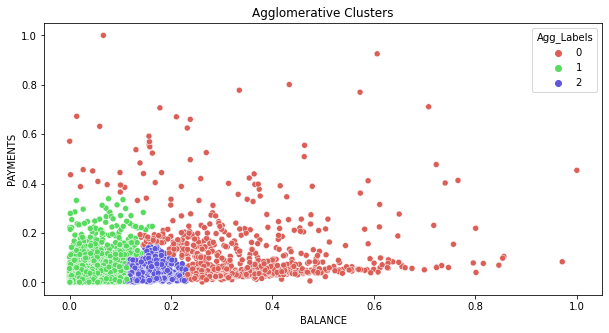

Time taken to run Agglomerative Clustering: 2.944298028945923 seconds


In [11]:
from sklearn.cluster import AgglomerativeClustering 

start=time()
agglom = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df2[['BALANCE','PAYMENTS']])
df2['Agg_Labels'] = agglom.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot( df2.iloc[:,0], df2.iloc[:,1],hue=df2['Agg_Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative Clusters')
plt.show()
print(f'Time taken to run Agglomerative Clustering: {time() - start} seconds')

Linkage ward with no.of clusters 3  is used here as they seem to work fine while comparing with DBSCAN.

#### METHOD 4:- HDBSCAN

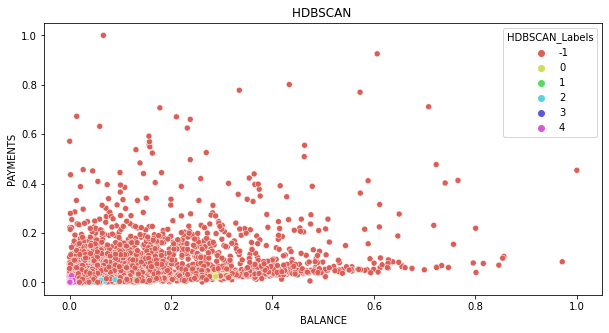

In [12]:
import hdbscan

hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=50)
hdbscan_clus.fit(df2[['BALANCE','PAYMENTS']])
df2['HDBSCAN_Labels'] = hdbscan_clus.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot( df2.iloc[:,0], df2.iloc[:,1],hue=df2['HDBSCAN_Labels'], 
palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
plt.title('HDBSCAN ')
plt.show()

Eventhough HDBSCAN can handle different density,in this dataset it failed to give perfect clusters.

##### Agglomerative and K means are better while comparing to DBSCAN and HDBSCAN

##### TASK 3

#### DIMENSION REDUCTION

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [14]:
range_n_clusters = [3, 4, 5]
components=2

In [15]:
#PCA
score1=[]
for n_clusters in range_n_clusters:
    scaled_values = scaler.fit_transform(df_scaled)
    
    components = min(components, len(cols))
    values = PCA().fit_transform(scaled_values)[:, :components]
    
    cluster = KMeans(n_clusters=n_clusters).fit_predict(values)
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit_predict(values)
    s_kmeans=silhouette_score(scaled_values, cluster)
    s_agglo=silhouette_score(scaled_values, agglom)
    print('Silhouette score-Kmeans for PCA :', s_kmeans,'where n_clusters=',n_clusters)
    print('Silhouette score-Agglo for PCA :', s_agglo,'where n_clusters=',n_clusters)
    score1.append(s_kmeans)

Silhouette score-Kmeans for PCA : 0.3757216212638917 where n_clusters= 3
Silhouette score-Agglo for PCA : 0.35068613818417493 where n_clusters= 3
Silhouette score-Kmeans for PCA : 0.2673199545300784 where n_clusters= 4
Silhouette score-Agglo for PCA : 0.23991127992779324 where n_clusters= 4
Silhouette score-Kmeans for PCA : 0.28175332819798765 where n_clusters= 5
Silhouette score-Agglo for PCA : 0.23849407634662556 where n_clusters= 5


In [16]:
#TSNE
score2=[]
for n_clusters in range_n_clusters:
    scaled_values = scaler.fit_transform(df_scaled)
    
    components = min(components, len(cols))
    values = TSNE( perplexity = 16).fit_transform(scaled_values)[:, :components]
    
    cluster = KMeans(n_clusters=n_clusters).fit_predict(values)
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit_predict(values)
    s_kmeans=silhouette_score(scaled_values, cluster)
    s_agglo=silhouette_score(scaled_values, agglom)
    print('Silhouette score-Kmeans for TSNE :', s_kmeans,'where n_clusters=',n_clusters)
    print('Silhouette score-Agglo for TSNE :', s_agglo,'where n_clusters=',n_clusters)
    score2.append(s_kmeans)

Silhouette score-Kmeans for TSNE : 0.22656485290206163 where n_clusters= 3
Silhouette score-Agglo for TSNE : 0.20417363473618502 where n_clusters= 3
Silhouette score-Kmeans for TSNE : 0.14467371856378902 where n_clusters= 4
Silhouette score-Agglo for TSNE : 0.1233282352352278 where n_clusters= 4
Silhouette score-Kmeans for TSNE : 0.11086391070551611 where n_clusters= 5
Silhouette score-Agglo for TSNE : 0.0394408232082476 where n_clusters= 5


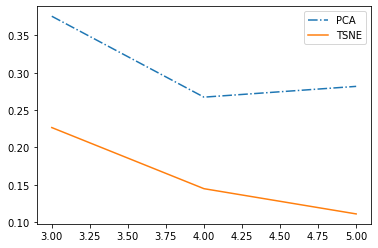

In [17]:
#Comparing PCA and TSNE

plt.plot(range_n_clusters,score1,'-.',label='PCA')
plt.plot(range_n_clusters,score2,label='TSNE')
plt.legend()
plt.show()

Choosing PCA dimension reduction technique because in both the models(K means,Agglomerative) they gave good results while comparing with TSNE.

##### Atlast choosing K means Model with PCA dimension reduction technique,even though k means model is not upto the expectation.

##### TASK 4

In [18]:
def plot_cluster(cluster_labels,df_pca):
    u_labels=np.unique(cluster_labels)
    for i in u_labels:
        plt.scatter(df_pca[cluster_labels==i,0],df_pca[cluster_labels==i,1],label=i)
        
    plt.legend()
    plt.show()

In [19]:
#PCA DIMENSION REDUCTION TECHNIQUE
df_pca=PCA(n_components=2).fit_transform(df_scaled)
df_pca

array([[-0.49204622, -0.10698665],
       [-0.62069095, -0.03013663],
       [ 0.29158121,  0.92292203],
       ...,
       [ 0.35722178, -0.39702329],
       [-0.65011311, -0.17049514],
       [-0.09625919,  0.4548037 ]])

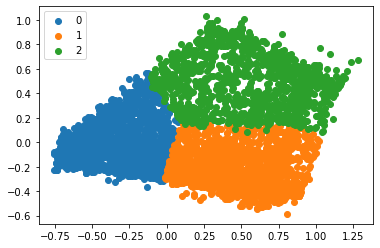

Time taken to run K Means: 0.4405040740966797 seconds


In [20]:
#FOR K MEANS
start = time()
cluster_labels=KMeans(n_clusters=3).fit_predict(df_scaled)
plot_cluster(cluster_labels,df_pca)
print(f'Time taken to run K Means: {time() - start} seconds')

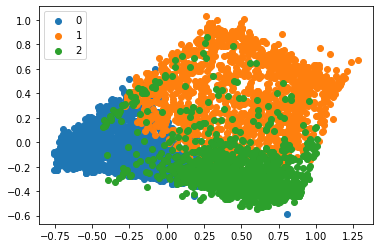

Time taken to run Agglomerative Clustering: 3.698922634124756 seconds


In [21]:
#FOR AGGLOMERATIVE CLUSTERING
start = time()
cluster_labels1=AgglomerativeClustering(n_clusters=3,linkage='ward').fit_predict(df_scaled)
plot_cluster(cluster_labels1,df_pca)
print(f'Time taken to run Agglomerative Clustering: {time() - start} seconds')

In [27]:
cluster=['KMeans','Agglomerative']
time_before_reduction=[1.15,2.94]
time_after_reduction=[0.44,3.69]
time=pd.DataFrame(time_before_reduction,columns=['Before_Reduction'])
time['After_Reduction']=time_after_reduction
time['Cluster']=cluster
time.set_index(['Cluster'])

,Before_Reduction,After_Reduction
Cluster,,
KMeans,1.15,0.44
Agglomerative,2.94,3.69


In [28]:
df_scaled['BEFORE_REDUCTION']=df2['Kmeans_Labels']
df_scaled['AFTER_REDUCTION']=cluster_labels
df_scaled['AFTER_REDUCTION']=df_scaled['AFTER_REDUCTION'].replace([0,1,2],['Category 3','Category 2','Category 1'])
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BEFORE_REDUCTION,AFTER_REDUCTION
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0,Low Balance,Category 3
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0,Medium Balance,Category 3
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0,Medium Balance,Category 1
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0,Low Balance,Category 3
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0,Low Balance,Category 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00000,0.002793,0.015025,0.001155,0.000569,0.000000,0.0,Low Balance,Category 3
8632,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006418,0.000640,0.500000,0.0,Low Balance,Category 2
8633,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001601,0.001078,0.250000,0.0,Low Balance,Category 2
8634,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001035,0.000729,0.250000,0.0,Low Balance,Category 3


In [29]:
#Using paymens and balance column for before reduction

In [30]:
df_scaled[['BEFORE_REDUCTION','AFTER_REDUCTION']]

,BEFORE_REDUCTION,AFTER_REDUCTION
0,Low Balance,Category 3
1,Medium Balance,Category 3
2,Medium Balance,Category 1
3,Low Balance,Category 3
4,Low Balance,Category 2
...,...,...
8631,Low Balance,Category 3
8632,Low Balance,Category 2
8633,Low Balance,Category 2
8634,Low Balance,Category 3


Before reduction and After reduction clusters are different and they can be seen in the above dataframe

In [31]:
#END